# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install citipy

#Analysis 
#======================================
#Observed trend 1

#based on the trends below,

#The extreme ends of the latitudes causes concern with the extreme temperatures,
#so countries between the latitudes -60 to -20 & 6 to 8' causes the temperate to drop 15'F & below 
#The latitude for -20 to 40 has the normal temperature of 30' to 20.

#Observed trend 2
#For extreme ends of the latitudes has normal spreadout of humidity percentage where 
#in the middle seems to be only consist of high percentage of humidity.


#Observed trend 3
#The latitude does not have any effects on the cloudiness

#The latitude does not have any effects on the wind speed

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import random
from pprint import pprint
import csv
#import logging



# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
api_key

'450cc54da3182e8f4e4396be235f73a5'

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [2]:
#A series of successive API calls ???


# Specify the URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid=450cc54da3182e8f4e4396be235f73a5&units={units}&q="

#base_url = "api.openweathermap.org/data/2.5/weather?q={London}"

# Make request and store response
response = requests.get(query_url+ "New York")


#pprint(response.content)

# Print status code
#print(response.status_code)

#slicing the data, random, store the sealevel, temp, pressure, population, dates


# Storing the JSON response within a variable
data = response.json()
#print(json.dumps(data, indent=6, sort_keys=True))
pprint (data)

humditiy = data["main"]["humidity"]
print (humditiy)

data.keys()




        


{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 40.73, 'lon': -73.99},
 'dt': 1567643385,
 'id': 5128581,
 'main': {'humidity': 61,
          'pressure': 1012,
          'temp': 26.23,
          'temp_max': 29.44,
          'temp_min': 22.22},
 'name': 'New York',
 'sys': {'country': 'US',
         'id': 4686,
         'message': 0.0122,
         'sunrise': 1567592748,
         'sunset': 1567639485,
         'type': 1},
 'timezone': -14400,
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 305.351, 'speed': 2.46}}
61


dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [25]:
counter = 0
for city in cities[:10]:
    city_data = requests.get(query_url + city).json()
    if city_data["cod"] == 200:
            print(city_data["cod"])

            
    else:
            counter = counter + 1
            print (city_data["cod"] + str(counter))


#to check the total valid cities in the dataset        

200
200
200
200
200
200
200
200
200
200


In [ ]:
print (counter)
j = 50 + counter
print (j)

In [26]:
array = []
i = 0
j = 10 + counter
counter_test = 0


for city in cities[:j]:
    city_data = requests.get(query_url + city).json()
    
    if city_data["cod"] == 200:
        try:
                
                #pprint (tempmax)
                tempmax=city_data["main"]["temp_max"]
                humidity=city_data["main"]["humidity"]
                speed=city_data['wind']["speed"]
                cloudiness=city_data["clouds"]["all"]
                lat=city_data["coord"]["lat"]
                country=city_data['sys']["country"]
                date=city_data['dt']
                lon=city_data["coord"]["lon"]
                array.append([city,cloudiness,country,date,humidity,lat,lon,tempmax,speed])
                i = i + 1
                pprint(f"counter {i} || {city}")
                print(query_url + city)# to print log file
                time.sleep(.1)
        except:
                print("city not found")
 
    else:
        counter_test = counter_test + 1    
        
pprint ("ready " + str(j))



'counter 1 || airai'
http://api.openweathermap.org/data/2.5/weather?appid=450cc54da3182e8f4e4396be235f73a5&units=metric&q=airai
'counter 2 || vaini'
http://api.openweathermap.org/data/2.5/weather?appid=450cc54da3182e8f4e4396be235f73a5&units=metric&q=vaini
'counter 3 || saldanha'
http://api.openweathermap.org/data/2.5/weather?appid=450cc54da3182e8f4e4396be235f73a5&units=metric&q=saldanha
'counter 4 || kaeo'
http://api.openweathermap.org/data/2.5/weather?appid=450cc54da3182e8f4e4396be235f73a5&units=metric&q=kaeo
'counter 5 || puerto ayora'
http://api.openweathermap.org/data/2.5/weather?appid=450cc54da3182e8f4e4396be235f73a5&units=metric&q=puerto ayora
'counter 6 || saint-philippe'
http://api.openweathermap.org/data/2.5/weather?appid=450cc54da3182e8f4e4396be235f73a5&units=metric&q=saint-philippe
'counter 7 || tasiilaq'
http://api.openweathermap.org/data/2.5/weather?appid=450cc54da3182e8f4e4396be235f73a5&units=metric&q=tasiilaq
'counter 8 || punta arenas'
http://api.openweathermap.org/data

In [12]:
#print (city)
#print (counter_test)

high level
9


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
data_df=pd.DataFrame(array,columns=["City","Cloudiness","Country", "Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
data_df.head()    

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,airai,40,TL,1567647357,47,-8.93,125.41,28.23,2.83
1,vaini,75,IN,1567647358,94,15.34,74.49,21.00,5.10
2,saldanha,0,PT,1567647359,54,41.42,-6.55,16.55,3.19
3,kaeo,100,NZ,1567647359,81,-35.10,173.78,17.22,4.02
4,puerto ayora,0,EC,1567647360,73,-0.74,-90.35,23.00,7.20


In [15]:
data_df["City"].unique().shape[0] #checking unique cities


91

In [50]:
#opens and write to csv file	
export_csv = data_df.to_csv (r'C:\Users\leroy\Desktop\Data Analysis\02-Homeworks\06-Python-APIs\export_dataframe.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path


In [16]:
#readable = time.ctime(date)
#readable

'Wed Sep  4 21:37:06 2019'

In [9]:
#date=time.strftime("%d/%m/%Y")


'04/09/2019'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

'04/09/2019'


<function matplotlib.pyplot.show(*args, **kw)>

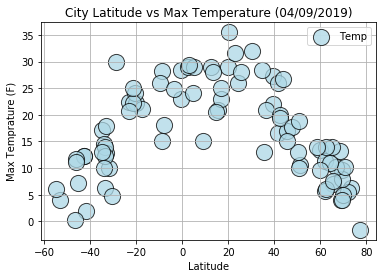

In [21]:
readable = time.strftime("%d/%m/%Y")
pprint (readable)


#plt.scatter(urban_num_rides, urban_fare, marker="o",s=urban_driver_count*8, alpha=0.75, facecolors="Coral", edgecolors="black", label='Urban')


plt.scatter(data_df["Lat"],data_df["Max Temp"],c="lightblue",marker="o", s=260, alpha=0.75, edgecolor='black', label='Temp')
plt.title(f"City Latitude vs Max Temperature ({readable})")
plt.ylabel("Max Temprature (F)")
plt.xlabel("Latitude")

plt.legend(loc='upper right')
plt.grid()
plt.savefig("../starter_code/cityLatitudevsmaxtemp.png")
plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

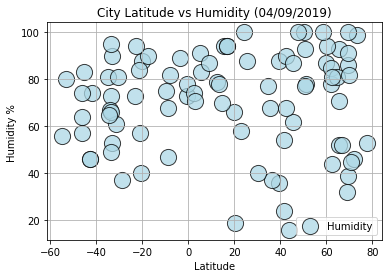

In [22]:
plt.scatter(data_df["Lat"],data_df["Humidity"],c="lightblue",marker="o",s=260, alpha=0.75,edgecolor='black', label ='Humidity')
plt.title(f"City Latitude vs Humidity ({readable})")
plt.ylabel("Humidity % ")
plt.xlabel("Latitude")

plt.legend(loc='lower right')
plt.grid()
plt.savefig("../starter_code/cityLatitudevshumd.png")
plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

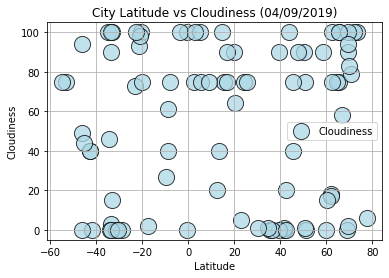

In [23]:
plt.scatter(data_df["Lat"],data_df["Cloudiness"],c="lightblue",marker="o",s=260, alpha=0.75,edgecolor='black', label ='Cloudiness')
plt.title(f"City Latitude vs Cloudiness ({readable})")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.legend(loc='best')
plt.grid()
plt.savefig("../starter_code/cityLatitudevscloudiness.png")
plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

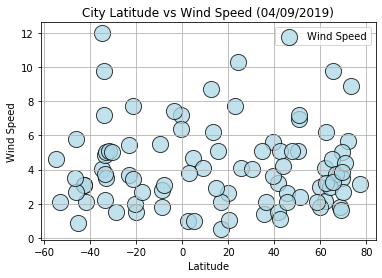

In [24]:
plt.scatter(data_df["Lat"],data_df["Wind Speed"],c="lightblue",marker="o",s=260, alpha=0.75,edgecolor='black', label ='Wind Speed')
plt.title(f"City Latitude vs Wind Speed ({readable})")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.legend(loc='best')
plt.grid()
plt.savefig("../starter_code/cityLatitudevsmwindspd.png")
plt.show